## Analysis of simulation data

### This notebooks contains scripts:
1. to read and pickle the rheology data, F_rig and z_net
2. load the pickle file
3. make plots using the bidi function

In [1]:
# importing libraries

import os
import matplotlib
import numpy             as     np
import pandas            as     pd
import scipy.optimize    as     opt
import matplotlib.pyplot as     plt
from matplotlib          import font_manager
from   fractions         import Fraction
import pickle
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='mkl')

In [2]:
# script to read and pickle data

# here we read, concatenate and pickle the simulation data from data_*.dat file, F_rig and z_net

# new

#TopDir     = "/media/rahul/Linux_1TB_HDD/Bidisperse_project/"
#TopDir     = "/Volumes/Extreme SSD/high_bidispersity/"
#TopDir      = "/Volumes/Rahul_2TB/high_bidispersity/"
TopDir      ="/mnt/250bea2d-f065-47c2-8ad6-1e6bf50ca8f8/Dropbox (City College)/CUNY/Research/Bidisperse Project/"

NP          = [1000]

run         = {500:8,1000:4,2000:2,4000:1}

phi         = [0.70,0.71,0.72,0.73,0.74,0.75]

ar          = [1.0, 1.4, 1.8, 2.0, 4.0]

data_file = 'data_files_.pkl'

if os.path.exists(TopDir+data_file):
    with open(TopDir+data_file, 'rb') as file:
        datasets_dict = pickle.load(file)
    print("\nData loaded from existing pickle file")

else:
    # files to read
    file_names = ['data_random_seed_params_stress100r_shear.dat','F_rig.txt','Z_Znet.txt']
    sum_variables = ['datasum', 'frigsum', 'znetsum']

    # initializing the dictionary
    datasets=[]                    
    datasets_dict = {key: None for key in datasets}

    for i in range(len(NP)):
        for j in range(len(phi)):
            for k in range(len(ar)):
                dataname=TopDir+'NP_'+str(NP[i])+'/phi_'+"{:.2f}".format(phi[j])+'/ar_'+str(ar[k])+'/Vr_0.5'
                if os.path.exists(dataname):
                    temp=[]
                    for l in range (run[NP[i]]):
                        for m, file_name in enumerate(file_names):
                            sum_variables[m]=0
                            with open(f'{dataname}/run_{l+1}/{file_name}', 'r') as file:
                                sum_variables[m] = np.loadtxt(file)
                                
                        sum_variables[1]=np.expand_dims(sum_variables[1], axis=1)       
                        dat_run=np.concatenate(sum_variables,axis=1)
                        temp.append(dat_run)
                    datasets_dict['NP_'+str(NP[i])+'_phi_'+"{:.2f}".format(phi[j])+'_ar_'+str(ar[k])]=temp

                else:
                    print('Path does not exist')
                    
    with open(TopDir+data_file, 'wb') as file:
        pickle.dump(datasets_dict, file)
    with open(TopDir+data_file, 'rb') as file:
        datasets_dict = pickle.load(file)
    
    print("\nData read and loaded")
    
######
#Structure of the dictionary:
#    key:[run1,run2,run3,run4]
#    runx.shape = (samples,35)


Data loaded from existing pickle file


In [3]:
(datasets_dict['NP_1000_phi_0.74_ar_1.0'][3]).shape

(3501, 35)

In [30]:
# # datapoint dict

# datasets=[]                    
# datapoint_dict = {key: None for key in datasets}
# std_dev_dict = {key: None for key in datasets}

# for i in range(len(NP)):
#     for j in range(len(phi)):
#         for k in range(len(ar)):
#             filename='NP_'+str(NP[i])+'_phi_'+"{:.2f}".format(phi[j])+'_ar_'+str(ar[k])
#             if filename in datasets_dict:
#                 #for l in range (run[NP[i]]):
#                 varray = np.vstack(datasets_dict[filename])
#                 datapoint_dict[filename] = np.mean(varray, axis=0)
#                 std_dev_dict[filename] = np.std(varray, axis=0)

In [3]:
# # datapoint dict

# datasets=[]                    
# datapoint_dict = {key: None for key in datasets}
# std_dev_dict = {key: None for key in datasets}

# for key in datasets_dict:
#     varray = np.vstack(datasets_dict[key])
#     datapoint_dict[key] = np.mean(varray, axis=0)
#     std_dev_dict[key] = np.std(varray, axis=0)

In [80]:
# datapoint dict
off=40
datasets=[]                    
datapoint_dict = {key: None for key in datasets}
std_dev_dict = {key: None for key in datasets}

for key in datasets_dict:
    #temp=[]
    temp = [np.mean(matrix[off:,:], axis=0) for matrix in datasets_dict[key]] #altered list
    #varray = np.vstack(temp)
    datapoint_dict[key] = temp
    #std_dev_dict[key] = np.std(temp, axis=0)

In [86]:
# datapoint dict
off=40
datasets=[]                    
datapoint_dict = {key: None for key in datasets}
std_dev_dict = {key: None for key in datasets}

for key in datasets_dict:
    mean_lists = [np.mean(matrix[off:,:], axis=0) for matrix in datasets_dict[key]] #altered list
    var_lists = [np.var(matrix[off:,:], axis=0) for matrix in datasets_dict[key]] 
    std_lists = [np.std(matrix[off:,:], axis=0) for matrix in datasets_dict[key]] 
    
    mean_varray = np.vstack(mean_lists)
    std_varray = np.vstack(var_lists)
    
    datapoint_dict[key] = np.mean(mean_varray, axis=0)
    std_dev_dict[key] = np.sqrt(np.mean(std_varray, axis=0))

In [93]:
datapoint_dict['NP_1000_phi_0.74_ar_1.0']

array([ 8.70598641e+01,  1.77000000e+01,  2.16400330e-01,  4.96653129e+02,
        4.87263627e+02,  1.41046764e+00,  5.90190258e+00,  2.07713586e+00,
        2.37523310e+02,  2.34492879e+02,  1.53801755e+01, -1.20318349e+03,
        5.82136797e+01, -2.00787152e-03,  8.84405445e-04,  2.42542285e+00,
        2.42542285e+00,  0.00000000e+00,  2.27617582e+03,  3.82806633e+00,
        6.50932601e+00,  2.36732309e-05,  1.00000000e+05,  1.00000000e+05,
        0.00000000e+00,  9.26515458e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+02,  0.00000000e+00,  9.70800347e+01,  2.42542285e+00,
        1.13183626e+00,  2.71029301e+00,  8.12745088e-01])

In [89]:
std_dev_dict['NP_1000_phi_0.74_ar_1.0']

array([5.00831494e+01, 9.99104599e+00, 5.66736790e-02, 1.42015989e+02,
       1.41515717e+02, 1.47902740e-01, 2.73666616e-01, 5.95121801e-01,
       2.02223472e+01, 2.01537497e+01, 9.59286186e+01, 4.23930768e+02,
       3.23313398e+00, 2.83435982e-04, 1.53114145e-04, 5.30797023e-02,
       5.30797023e-02, 0.00000000e+00, 1.30392656e+01, 1.23956317e+00,
       3.33880341e+00, 2.86385959e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.31843795e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.31139291e+01, 5.30797023e-02,
       2.31995523e-02, 4.53891309e-02, 1.70951131e-02])

In [26]:
type(matrix_list[1])

numpy.ndarray

In [69]:
import random
a = [random.randint(1, 100) for _ in range(10)]
b = [random.randint(1, 100) for _ in range(10)]
c = [random.randint(1, 100) for _ in range(10)]

In [73]:
np.sqrt(np.mean([np.var(a),np.var(b),np.var(c)]))

23.26492352591486

In [74]:
np.mean([np.std(a),np.std(b),np.std(c)])

22.868903304868994

In [75]:
np.std([a+b+c])

25.395647046076395

In [72]:
(np.mean([np.std(a),np.std(b),np.std(c)]))/(np.std([a+b+c]))

0.9005048488576399

In [19]:
type(datasets_dict['NP_1000_phi_0.75_ar_1.4'][0]).shape()

numpy.ndarray

In [22]:
datasets_dict['NP_1000_phi_0.71_ar_1.4'][0].shape

(5001, 35)

In [4]:
## Labels for plots

labels = [
    { # Title for rheoplots
        30: r'$\mathit{f}_{\mathit{rig}}$ vs $\delta$',
        33: r'$\mathit{Z}_{\mathit{net}}\ \mathit{(mean)}$ vs $\delta$',
        3: r'$\mathit{\eta_{r}}$ vs $\delta$',
        10: r'$\mathit{N_{1}}$ vs $\delta$',
        11: r'$\mathit{N_{2}}$ vs $\delta$',
        16: r'$\mathit{f}_{\mathit{(z \geq 3)}}$ vs $\delta$',
        4: r'$\mathit{\eta_{contact}}$ vs $\delta$',
        5: r'$\mathit{\eta_{dashpot}}$ vs $\delta$',
        6: r'$\mathit{\eta_{hydro}}$ vs $\delta$',
        7: r'$\mathit{\eta_{repulsion}}$ vs $\delta$',
    },
    { # Title for rheoplots_
        30: r'$\mathit{f}_{\mathit{rig}}$ vs $\phi$',
        33: r'$\mathit{Z}_{\mathit{net}}\ \mathit{(mean)}$ vs $\phi$',
        3: r'$\mathit{\eta_{r}}$ vs $\phi$',
        10: r'$\mathit{N_{1}}$ vs $\phi$',
        11: r'$\mathit{N_{2}}$ vs $\phi$',
        16: r'$\mathit{f}_{\mathit{(z \geq 3)}}$ vs $\phi$',
        4: r'$\mathit{\eta_{contact}}$ vs $\phi$',
        5: r'$\mathit{\eta_{dashpot}}$ vs $\phi$',
        6: r'$\mathit{\eta_{hydro}}$ vs $\phi$',
        7: r'$\mathit{\eta_{repulsion}}$ vs $\phi$',
    },
    { # Y label
        30: r'$\mathit{f}_{\mathit{rig}}$',
        33: r'$\mathit{Z}_{\mathit{net}}\ \mathit{(mean)}$',
        3: r'$\mathit{\eta_{r}}$',
        10: r'$\mathit{N_{1}}$',
        11: r'$\mathit{N_{2}}$',
        16: r'$\mathit{f}_{\mathit{(z \geq 3)}}$',
        4: r'$\mathit{\eta_{contact}}$',
        5: r'$\mathit{\eta_{dashpot}}$',
        6: r'$\mathit{\eta_{hydro}}$',
        7: r'$\mathit{\eta_{repulsion}}$',
    },
    { # fig name wrt del (rheoplots)
        30: "frig_vs_del_NP_1000",
        33: "Znet(mean)_vs_del_NP_1000",
        3: "viscosity_vs_del_NP_1000",
        10: "N1_vs_del_NP_1000",
        11: "N2_vs_del_NP_1000",
        16: "f_(z>=3)_vs_del_NP_1000",
        4: "visc(contact)_vs_del_NP_1000",
        5: "visc(dashpot)_vs_del_NP_1000",
        6: "visc(hydro)_vs_del_NP_1000",
        7: "visc(repulsion)_vs_del_NP_1000",
        
    },
    { # fig name wrt phi (rheoplots_)
        30: "frig_vs_phi_NP_1000",
        33: "Znet(mean)_vs_phi_NP_1000",
        3: "viscosity_vs_phi_NP_1000",
        10: "N1_vs_phi_NP_1000",
        11: "N2_vs_phi_NP_1000",
        16: "f_(z>=3)_vs_phi_NP_1000",
        4: "visc(contact)_vs_phi_NP_1000",
        5: "visc(dashpot)_vs_phi_NP_1000",
        6: "visc(hydro)_vs_phi_NP_1000",
        7: "visc(repulsion)_vs_phi_NP_1000",
        
    }
    
]

In [5]:
#new

plt.rcParams.update({
  "figure.max_open_warning": 0,
  "text.usetex": True,
  "text.latex.preamble": r"\usepackage{type1cm}",
  "figure.autolayout": True,
  "font.family": "STIXGeneral",
  "mathtext.fontset": "stix",
  "font.size":        8,
  "xtick.labelsize":  8,
  "ytick.labelsize":  8,
  "lines.linewidth":  1,
  "lines.markersize": 5
})
plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"

def bidi(npp,y,x,run=1,figsave=False,off=40):
    plt.clf()

    FigSize   = (5*4,5*4*3/4)
    cmap = plt.get_cmap('Set1')
    n_rows=len(phi)
    n_cols=len(ar)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=FigSize, sharex=False, sharey=True)
    yvals=[]
    for i, phii in enumerate(phi):
        for j, arj in enumerate(ar):
            filename='NP_'+str(npp)+'_phi_'+"{:.2f}".format(phii)+'_ar_'+str(arj)
            yvals.append(datasets_dict[filename][run-1][off:,x])
    ylist=[item for sublist in yvals for item in sublist]
    
    for i, phii in enumerate(phi):
        for j, arj in enumerate(ar):
            filename='NP_'+str(npp)+'_phi_'+"{:.2f}".format(phii)+'_ar_'+str(arj)
            color = cmap(0.0)
            axs[i, j].plot(datasets_dict[filename][run-1][off:,y], datasets_dict[filename][run-1][off:,x],color='black')
            axs[i, j].grid(which='Both', alpha=0.2)
            axs[i, j].set_ylim(min(ylist), max(ylist)*1.01)
            axs[0, j].set_title(fr'$\mathit{{\delta}} = \mathrm{{{arj}}}$', fontsize=15)
            axs[-1, j].set_xlabel(r'$\mathit{\gamma}$', fontsize=15)
     
        axs[i, 0].set_ylabel(labels[2][x], fontsize=15)
        
        ypos = axs[i, 0].get_position().get_points()[0, 1]
        fig.text(1.00, (ypos*1.18)-.03, fr'$\mathit{{\phi}} = {phii:.2f}$', va='center', rotation=90, fontsize=13)
        
    fig.suptitle(f'NP = {npp}',fontsize=18)
    plt.tight_layout()
    plt.subplots_adjust(top=0.942)
    plt.show()
    
    if figsave:
        figFormat=".pdf"
        fig.savefig("fcontact_vs_strain_NP_1000"+figFormat, bbox_inches="tight")
    return

<Figure size 640x480 with 0 Axes>

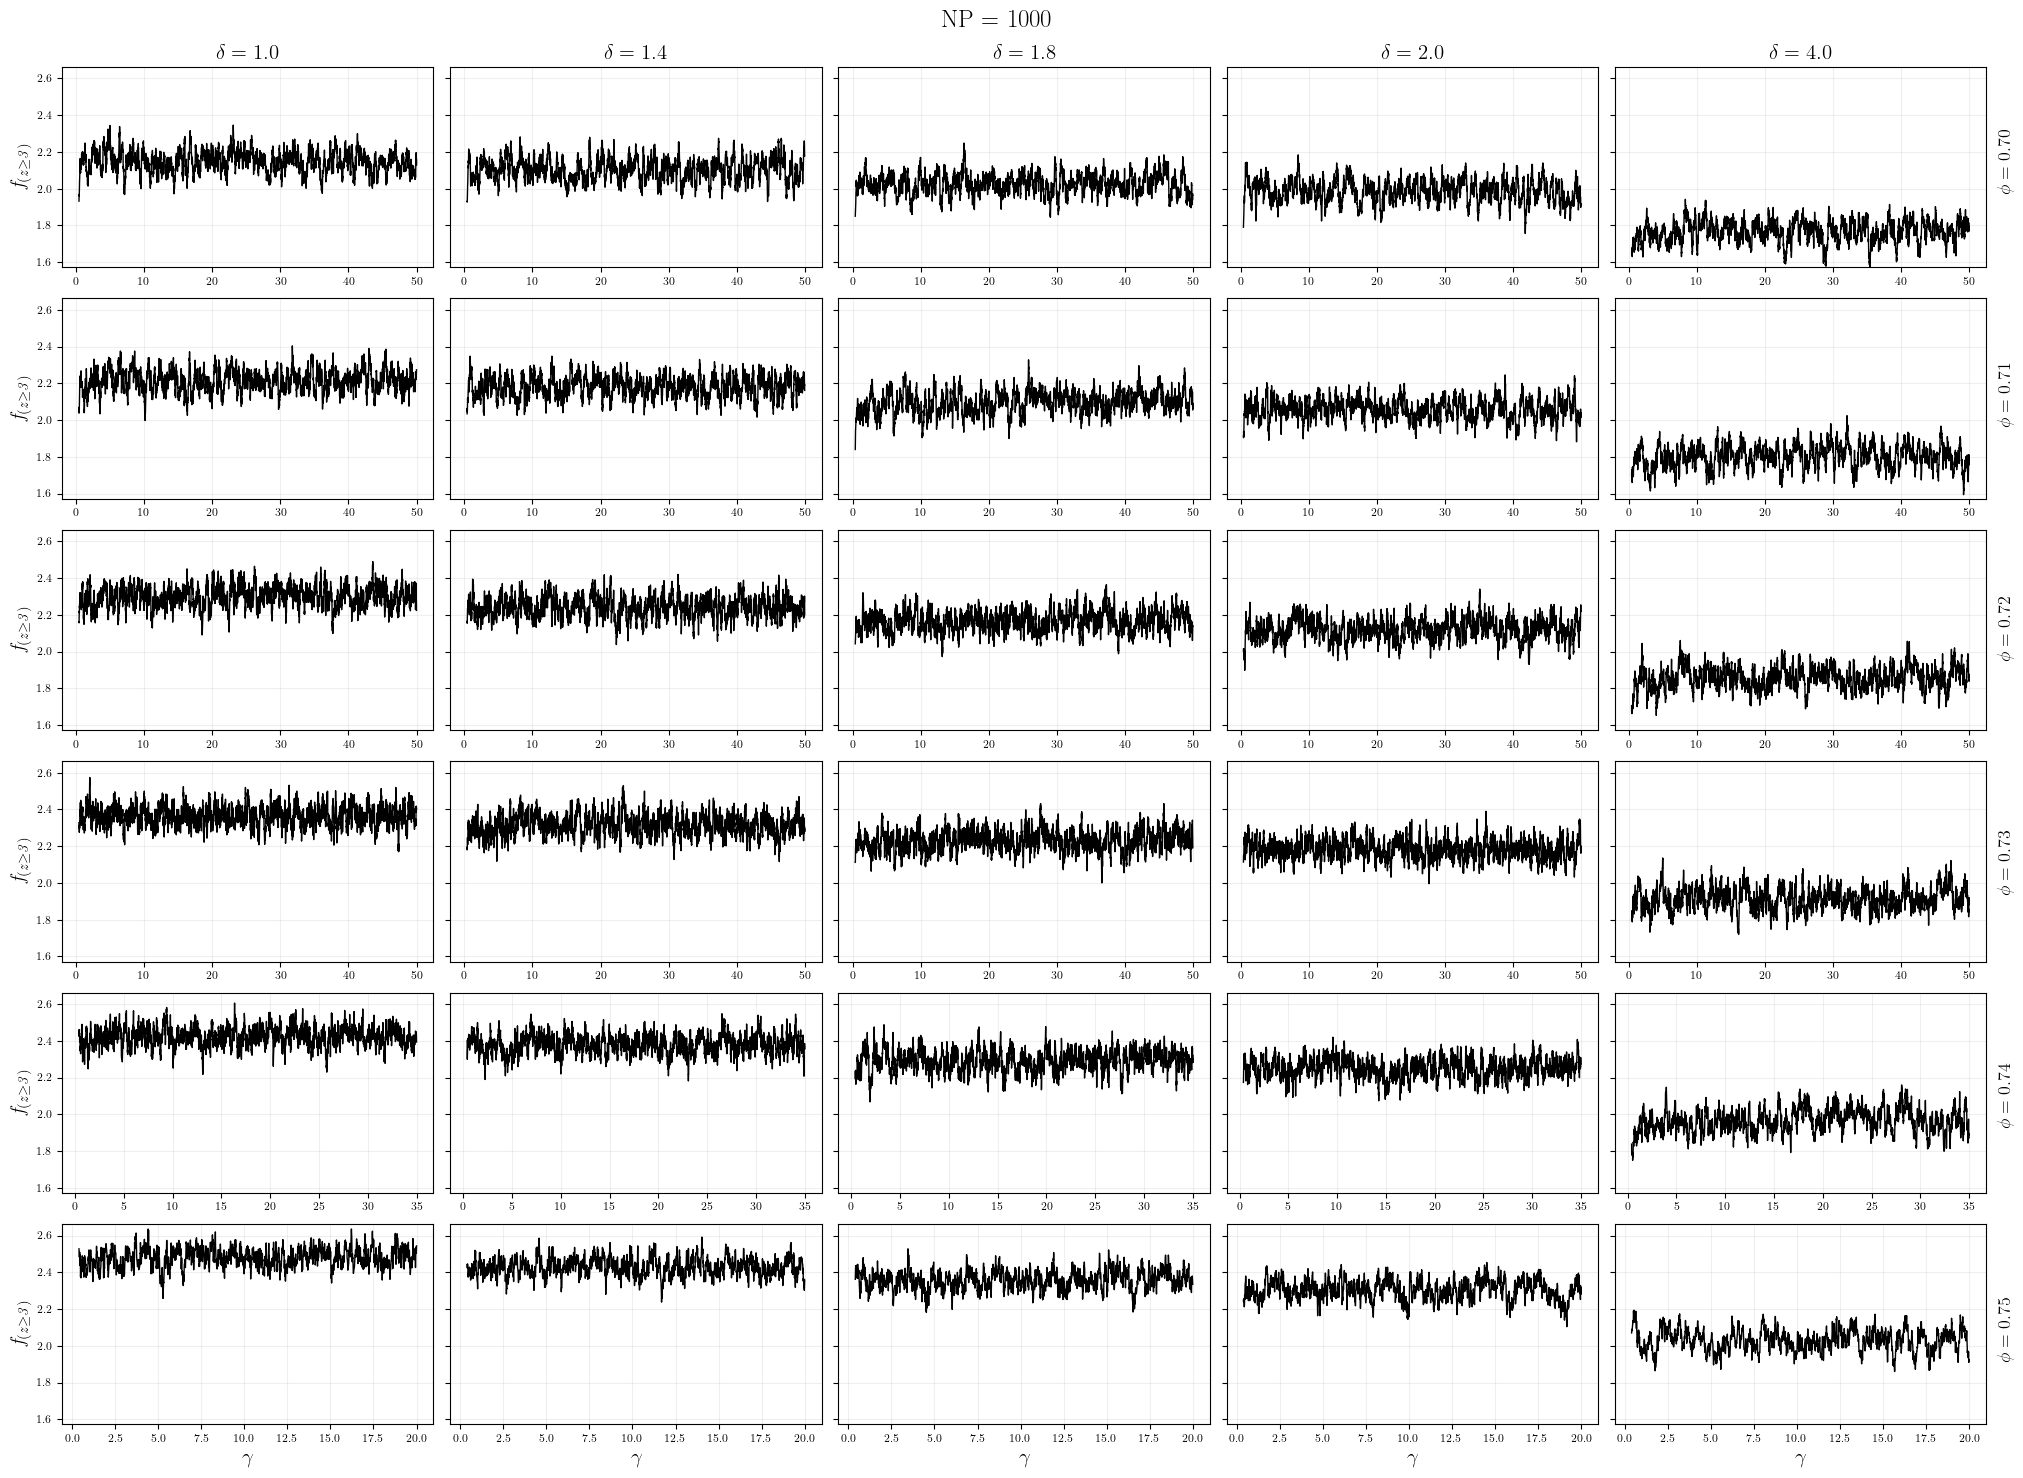

In [43]:
bidi(1000,1,16,2)

### Parameters

| Column 1                              | Column 2                                | Column 3                                | Column 4                                    | Column 5                                  |
|:--------------------------------------|:----------------------------------------|:----------------------------------------|:--------------------------------------------|:------------------------------------------|
| <div style="text-align: left; font-size: 14px;">0. time</div>                               | <div style="text-align: left; font-size: 14px;">6. Viscosity(hydro)</div>                    | <div style="text-align: left; font-size: 14px;">11. N2 viscosity</div>                      | <div style="text-align: left; font-size: 14px;">16. frictional contact number</div>         | <div style="text-align: left; font-size: 14px;">21. max angular velocity</div>              |
| <div style="text-align: left; font-size: 14px;">1. cumulated shear strain</div>             | <div style="text-align: left; font-size: 14px;">7. Viscosity(repulsion)</div>                | <div style="text-align: left; font-size: 14px;">12. energy</div>                            | <div style="text-align: left; font-size: 14px;">17. average sliding friction</div>          | <div style="text-align: left; font-size: 14px;">22. dt</div>                               |
| <div style="text-align: left; font-size: 14px;">2. shear rate</div>                         | <div style="text-align: left; font-size: 14px;">8. particle pressure</div>                   | <div style="text-align: left; font-size: 14px;">13. min gap</div>                           | <div style="text-align: left; font-size: 14px;">18. number of interactions</div>            | <div style="text-align: left; font-size: 14px;">23. kn</div>                               |
| <div style="text-align: left; font-size: 14px;">3. viscosity</div>                          | <div style="text-align: left; font-size: 14px;">9. particle pressure contact</div>           | <div style="text-align: left; font-size: 14px;">14. max tangential displacement</div>       | <div style="text-align: left; font-size: 14px;">19. max velocity</div>                      | <div style="text-align: left; font-size: 14px;">24. kt</div>                               |
| <div style="text-align: left; font-size: 14px;">4. Viscosity(contact)</div>                  | <div style="text-align: left; font-size: 14px;">10. N1 viscosity</div>                       | <div style="text-align: left; font-size: 14px;">15. contact number</div>                    | <div style="text-align: left; font-size: 14px;">20. max velocity</div>                      | <div style="text-align: left; font-size: 14px;">25. kr</div>                               |
| <div style="text-align: left; font-size: 14px;">5. Viscosity(dashpot)</div>                  | <div style="text-align: left; font-size: 14px;">26. shear strain</div>                      | <div style="text-align: left; font-size: 14px;">27. shear strain</div>                      | <div style="text-align: left; font-size: 14px;">28. shear strain</div>                      | <div style="text-align: left; font-size: 14px;">29. theta shear</div>                       |
| <div style="text-align: left; font-size: 14px;">30. Rigid clusters</div>                     | <div style="text-align: left; font-size: 14px;">31. mean(Z)</div>                           | <div style="text-align: left; font-size: 14px;">32. std(Z)</div>                            | <div style="text-align: left; font-size: 14px;">33. mean(Znet)</div>                        | <div style="text-align: left; font-size: 14px;">34. std(Znet)</div>                         |


In [6]:
## new

plt.rcParams.update({
  "figure.max_open_warning": 0,
  "text.usetex": True,
  "figure.autolayout": True,
  "font.family": "STIXGeneral",
  "mathtext.fontset": "stix",
  "font.size":        8,
  "xtick.labelsize":  8,
  "ytick.labelsize":  8,
  "lines.linewidth":  1,
  "lines.markersize": 5
})
plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"


# datapoint dict
off=40
datasets=[]                    
datapoint_dict = {key: None for key in datasets}
std_dev_dict = {key: None for key in datasets}

for key in datasets_dict:
    #temp=[]
    mean_lists = [np.mean(matrix[off:,:], axis=0) for matrix in datasets_dict[key]] #altered list
    var_lists = [np.var(matrix[off:,:], axis=0) for matrix in datasets_dict[key]] 
    
    mean_varray = np.vstack(mean_lists)
    std_varray = np.vstack(var_lists)
    
    datapoint_dict[key] = np.mean(mean_varray, axis=0)
    std_dev_dict[key] = np.sqrt(np.mean(std_varray, axis=0))
    
def param_vs_del(npp,x,figsave=False):
    plt.clf()
    arr       = ar
    cmap      = matplotlib.colormaps['viridis_r']
    
    for i, phii in enumerate(phi):
        dat=[]
        daterr=[]
        for j, arj in enumerate(arr):
            filename='NP_'+str(npp)+'_phi_'+"{:.2f}".format(phii)+'_ar_'+str(arj)
            dat.append(datapoint_dict[filename][x])
            daterr.append(std_dev_dict[filename][x])
        plt.errorbar(arr, dat, yerr=daterr,fmt='--o',label=r'$\phi$' + f' = {phii:.2f}',color=cmap((i+1)/len(phi)),capsize=2,linewidth=1.2,elinewidth=.5)
        
    plt.grid(which='Both', alpha=0.2)
    
    plt.title(labels[0][x], fontsize=18)
    plt.xlabel(r'$\delta$', fontsize=14,fontstyle='italic')
    plt.ylabel(labels[2][x],fontsize=14,fontstyle='italic')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    
    plt.legend(loc='upper right', labelspacing=1.5,borderpad=1.2)
    #plt.legend(loc='upper left', labelspacing=1.2,borderpad=1.0)
    #plt.legend(loc='lower left', labelspacing=1.5,borderpad=1.2)
    
    plt.tight_layout()
    if figsave:
        figFormat=".png"
        plt.savefig(labels[3][x]+figFormat, bbox_inches="tight",dpi=500)
    return
    plt.show()
    
def param_vs_phi(npp,x,figsave=False):
    plt.clf()
    phi_vals       = phi
    arr            = ar
    
    cmap      = matplotlib.colormaps['viridis_r']
    
    for j, arj in enumerate(arr):
        phi_vals       = phi
        dat=[]
        daterr=[]
        for i, phii in enumerate(phi_vals):
            filename='NP_'+str(npp)+'_phi_'+"{:.2f}".format(phii)+'_ar_'+str(arj)
            dat.append(datapoint_dict[filename][x])
            daterr.append(std_dev_dict[filename][x])
        plt.errorbar(phi_vals, dat, yerr=daterr, fmt='--o', label=r'$\delta = {:.1f}$'.format(arj), color=cmap((j+1)/len(arr)), capsize=2, linewidth=1.2, elinewidth=0.5)

    plt.grid(which='Both', alpha=0.2)
    
    plt.title(labels[1][x], fontsize=18)
    plt.xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
    plt.ylabel(labels[2][x], fontsize=14,fontstyle='italic')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    
    plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    #plt.legend(loc='upper left', labelspacing=1.2,borderpad=1.0)
    #plt.legend(loc='lower left', labelspacing=1.5,borderpad=1.2)
    
    plt.tight_layout()
    
    if figsave:
        figFormat=".d"
        plt.savefig(labels[4][x]+figFormat, bbox_inches="tight",dpi=500)
    return
    plt.show()

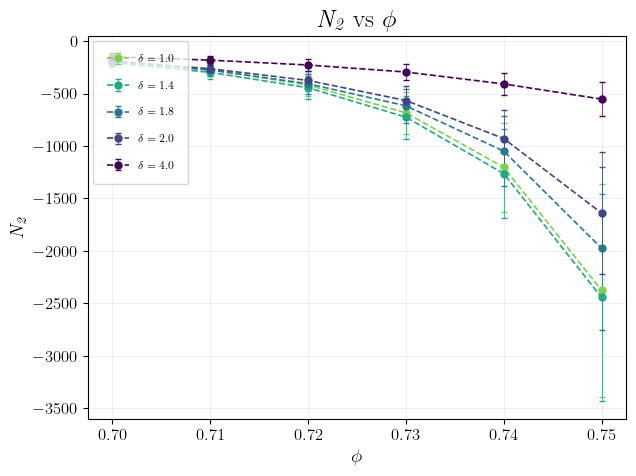

In [104]:
param_vs_phi(1000,11)

In [7]:
#new
off=40
datasets=[]                    
datapoint_dict = {key: None for key in datasets}
std_dev_dict = {key: None for key in datasets}

for key in datasets_dict:
    mean_lists = [np.mean(matrix[off:,:], axis=0) for matrix in datasets_dict[key]] #altered list
    var_lists = [np.var(matrix[off:,:], axis=0) for matrix in datasets_dict[key]] 
    std_lists = [np.std(matrix[off:,:], axis=0) for matrix in datasets_dict[key]] 
    
#     mean_varray = np.vstack(mean_lists)
#     std_varray = np.vstack(var_lists)
    
    datapoint_dict[key] = mean_lists
    std_dev_dict[key] = std_lists
    
def runs_vs_del(npp,x,phii=0.75,figsave=False):
    plt.clf()
    arr       = ar
    cmap      = matplotlib.colormaps['viridis_r']
    
    for l in range (run[npp]):
        dat=[]
        daterr=[]
        for j, arj in enumerate(arr):
            filename='NP_'+str(npp)+'_phi_'+"{:.2f}".format(phii)+'_ar_'+str(arj)
            dat.append(datapoint_dict[filename][l][x])
            daterr.append(std_dev_dict[filename][l][x])
        plt.errorbar(arr, dat, yerr=daterr,fmt='--o',label='run' + f' {l+1}',color=cmap((l+1)/len(range (run[npp]))),capsize=2,linewidth=1.2,elinewidth=.5)
        
    plt.grid(which='Both', alpha=0.2)
    
    plt.title(labels[0][x], fontsize=18)
    plt.xlabel(r'$\delta$', fontsize=14,fontstyle='italic')
    plt.ylabel(labels[2][x],fontsize=14,fontstyle='italic')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.legend(loc='upper right', labelspacing=1.5,borderpad=1.2)
    plt.tight_layout()
    if figsave:
        figFormat=".png"
        plt.savefig(labels[3][x]+figFormat, bbox_inches="tight",dpi=500)
    return
    plt.show()
    
def runs_vs_phi(npp,x,dell=1.4,figsave=False):
    plt.clf()
    
    phi_vals  = phi
    arr       = ar
    cmap      = matplotlib.colormaps['viridis_r']
    
    for l in range (run[npp]):
        dat=[]
        daterr=[]
        for i, phii in enumerate(phi_vals):
            filename='NP_'+str(npp)+'_phi_'+"{:.2f}".format(phii)+'_ar_'+str(dell)
            dat.append(datapoint_dict[filename][l][x])
            daterr.append(std_dev_dict[filename][l][x])
        plt.errorbar(phi_vals, dat, yerr=daterr,fmt='--o',label='run' + f' {l+1}',color=cmap((l+1)/len(range (run[npp]))),capsize=2,linewidth=1.2,elinewidth=.5)
        
    plt.grid(which='Both', alpha=0.2)
    
    plt.title(labels[1][x], fontsize=18)
    plt.xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
    plt.ylabel(labels[2][x],fontsize=14,fontstyle='italic')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    #plt.legend(loc='upper left', labelspacing=1.2,borderpad=1.0)
    #plt.legend(loc='lower left', labelspacing=1.5,borderpad=1.2)
    plt.tight_layout()
    
    if figsave:
        figFormat=".d"
        plt.savefig(labels[4][x]+figFormat, bbox_inches="tight",dpi=500)
    return
    plt.show()

In [109]:
datapoint_dict['NP_1000_phi_0.74_ar_1.0'][0][16]

2.421162669748629

In [115]:
std_dev_dict['NP_1000_phi_0.74_ar_1.0'][0][16]

0.052710681045239446

In [124]:
len(range(4))

4

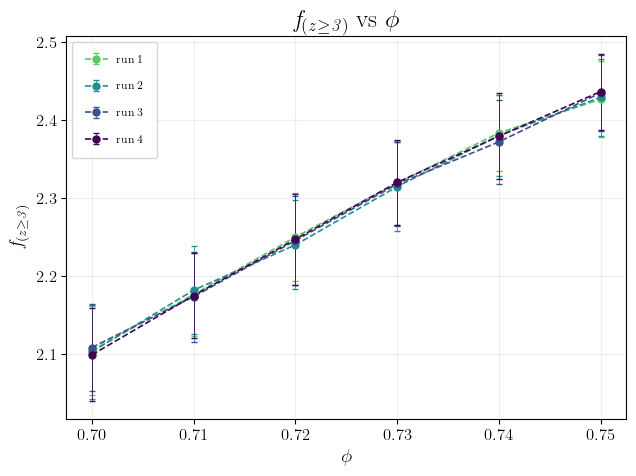

In [137]:
runs_vs_phi(1000,16)

In [70]:
# new

def param_vs_run(npp,x,phii=0.75,dell=1.4,figsave=False,off=40):
    plt.clf()
    cmap      = matplotlib.colormaps['viridis_r']
    
    filename='NP_'+str(npp)+'_phi_'+"{:.2f}".format(phii)+'_ar_'+str(dell)
    
    dat=[]
    daterr=[]
    for l in range(run[npp]):
        dat.append(datapoint_dict[filename][l][x])
        daterr.append(std_dev_dict[filename][l][x])
    plt.errorbar(list(range(1,run[1000]+1)), dat, yerr=daterr, fmt='o', label=r'$\delta = {:.1f}$, $\phi = {:.2f}$'.format(dell, phii), color=cmap((l+1)/len(range(run[npp]))), capsize=2, linewidth=1.2, elinewidth=0.5)

    plt.grid(which='Both', alpha=0.2)
    
    plt.title(labels[1][x], fontsize=18)
    plt.xlabel('runs', fontsize=14,fontstyle='italic')
    plt.ylabel(labels[2][x],fontsize=14,fontstyle='italic')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    #plt.legend(loc='upper left', labelspacing=1.2,borderpad=1.0)
    #plt.legend(loc='lower left', labelspacing=1.5,borderpad=1.2)
    plt.tight_layout()
    
    plt.ylim(np.mean(dat)*.95, np.mean(dat)*1.05)
    
    if figsave:
        figFormat=".pdf"
        plt.savefig(labels[4][x]+figFormat, bbox_inches="tight",dpi=500)
    return
    plt.show()

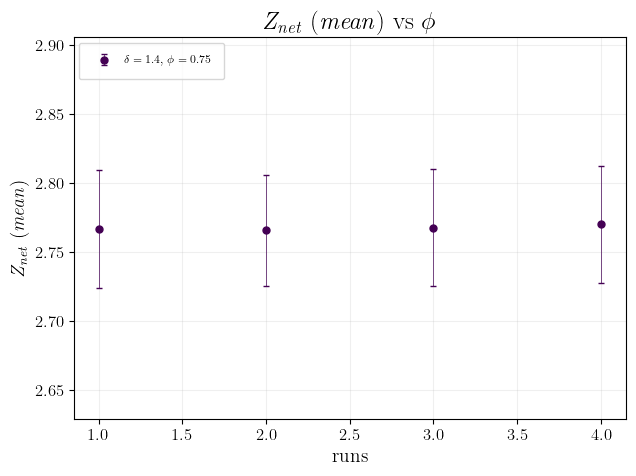

In [71]:
param_vs_run(1000,33,.75,1.4)

In [94]:
# new
def param_vs_gamma_runs(npp,y,x,phii=0.75,dell=1.4,run=1,figsave=False,off=40):
    plt.clf()
    
    arj=dell
    
    #FigSize   = (5*4,5*4*3/4)
    cmap = plt.get_cmap('Set1')
    #n_rows=len(phi)
    #n_cols=len(ar)
    #fig, axs = plt.subplots(n_rows, n_cols, figsize=FigSize, sharex=False, sharey=True)
    yvals=[]
    filename='NP_'+str(npp)+'_phi_'+"{:.2f}".format(phii)+'_ar_'+str(arj)
    for l in range(4):
        y_smooth = np.convolve(datasets_dict[filename][l][off:,x], np.ones(10)/10, mode='valid')
        xx=datasets_dict[filename][l][off:,y]
        plt.plot(xx[4:], y_smooth,color='black')
        color = cmap(0.0)
            
    #plt.ylim(min(ylist), max(ylist)*1.01)
    #plt.set_title(fr'$\mathit{{\delta}} = \mathrm{{{arj}}}$', fontsize=15)
    #plt.set_xlabel(r'$\mathit{\gamma}$', fontsize=15)
    
            #axs[i, j].plot(datasets_dict[filename][run-1][off:,y], datasets_dict[filename][run-1][off:,x],color='black')
            #axs[i, j].grid(which='Both', alpha=0.2)
            #axs[i, j].set_ylim(min(ylist), max(ylist)*1.01)
            #axs[0, j].set_title(fr'$\mathit{{\delta}} = \mathrm{{{arj}}}$', fontsize=15)
            #axs[-1, j].set_xlabel(r'$\mathit{\gamma}$', fontsize=15)
     
        #axs[i, 0].set_ylabel(labels[2][x], fontsize=15)
        
        #ypos = axs[i, 0].get_position().get_points()[0, 1]
        #fig.text(1.00, (ypos*1.18)-.03, fr'$\mathit{{\phi}} = {phii:.2f}$', va='center', rotation=90, fontsize=13)
        
    #fig.suptitle(f'NP = {npp}',fontsize=18)
    plt.tight_layout()
    #plt.subplots_adjust(top=0.942)
    plt.show()
    
    if figsave:
        figFormat=".pdf"
        fig.savefig("fcontact_vs_strain_NP_1000"+figFormat, bbox_inches="tight")
    return

ValueError: x and y must have same first dimension, but have shapes (1957,) and (1952,)

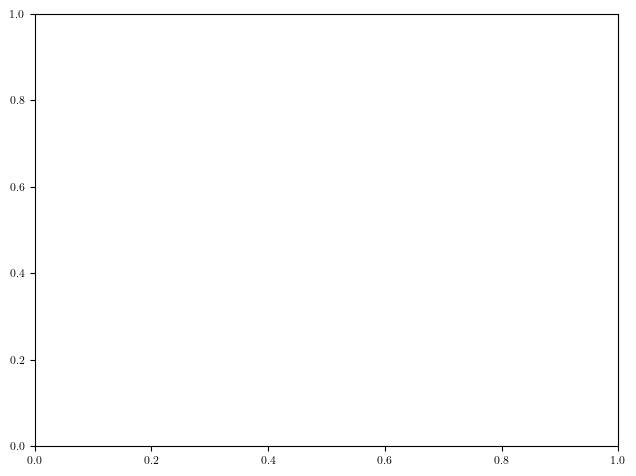

In [95]:
param_vs_gamma_runs(1000,1,16)

In [74]:
run

{500: 8, 1000: 4, 2000: 2, 4000: 1}

In [65]:
plt.rcParams.update({
  "figure.max_open_warning": 0,
  "text.usetex": True,
  "figure.autolayout": True,
  "font.family": "STIXGeneral",
  "mathtext.fontset": "stix",
  "font.size":        8,
  "xtick.labelsize":  8,
  "ytick.labelsize":  8,
  "lines.linewidth":  1,
  "lines.markersize": 5
})
plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"

def rheoPlotsd(npp,x,figsave=False,off=40):
    plt.clf()
    arr       = ar
    cmap      = matplotlib.colormaps['viridis_r']
    
    for i, phii in enumerate(phi):
        dat=[]
        daterr=[]
        for j, arj in enumerate(arr):
            filename='NP_'+str(npp)+'_phi_'+"{:.2f}".format(phii)+'_ar_'+str(arj)
            if filename in datasets_dict:
                dat.append(np.mean(datasets_dict[filename][off:,x]))
                daterr.append(np.std(datasets_dict[filename][off:,x]))
            else:
                arr = arr[1:]
        plt.errorbar(arr, dat, yerr=daterr,fmt='--o',label=r'$\phi$' + f' = {phii:.2f}',color=cmap((i+1)/len(phi)),capsize=2,linewidth=1.2,elinewidth=.5)
        
    plt.grid(which='Both', alpha=0.2)
    
    plt.title(labels[0][x], fontsize=18)
    plt.xlabel(r'$\delta$', fontsize=14,fontstyle='italic')
    plt.ylabel(labels[2][x],fontsize=14,fontstyle='italic')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.legend(loc='upper right', labelspacing=1.5,borderpad=1.2)
    plt.tight_layout()
    if figsave:
        figFormat=".png"
        plt.savefig(labels[3][x]+figFormat, bbox_inches="tight",dpi=500)
    return
    plt.show()
    
def rheoPlotsp(npp,x,figsave=False,off=40):
    plt.clf()
    
    phi_vals       = phi
    arr            = ar
    
    cmap      = matplotlib.colormaps['viridis_r']
    
    for j, arj in enumerate(arr):
        phi_vals       = phi
        dat=[]
        daterr=[]
        for i, phii in enumerate(phi_vals):
            filename='NP_'+str(npp)+'_phi_'+"{:.2f}".format(phii)+'_ar_'+str(arj)
            if filename in datasets_dict:
                dat.append(np.mean(datasets_dict[filename][off:,x]))
                daterr.append(np.std(datasets_dict[filename][off:,x]))
            else:
                phi_vals = phi_vals[:-1]
        plt.errorbar(phi_vals, dat, yerr=daterr, fmt='--o', label=r'$\delta = {:.1f}$'.format(arj), color=cmap((j+1)/len(arr)), capsize=2, linewidth=1.2, elinewidth=0.5)

    plt.grid(which='Both', alpha=0.2)
    
    plt.title(labels[1][x], fontsize=18)
    plt.xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
    plt.ylabel(labels[2][x],fontsize=14,fontstyle='italic')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    #plt.legend(loc='upper left', labelspacing=1.2,borderpad=1.0)
    #plt.legend(loc='lower left', labelspacing=1.5,borderpad=1.2)
    plt.tight_layout()
    
    if figsave:
        figFormat=".d"
        plt.savefig(labels[4][x]+figFormat, bbox_inches="tight",dpi=500)
    return
    plt.show()

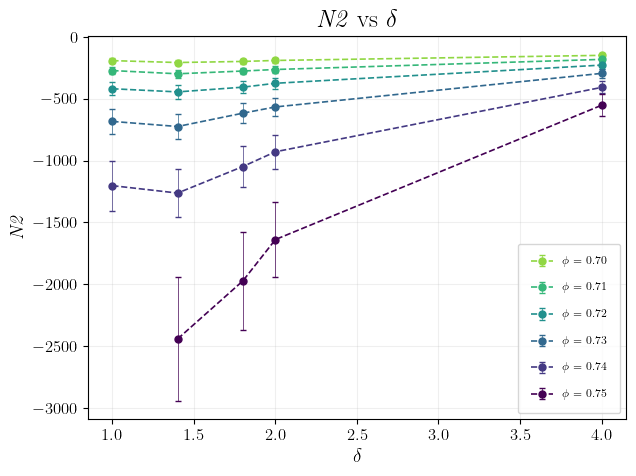

In [66]:
rheoPlots(1000,1,11, True)